## **Project 4**

#### **Pre-processing of the Data**

We need first to transform the data as we did in the ProjectEx1 :

In [439]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

diseases_df = pd.read_csv("CVD_cleaned.csv")

#Transfomation of the column "Sex" to a binary column "Is_Male with value 1 if the patient is a male and 0 if not".

diseases_df.rename(columns={'Sex': 'Is_Male'}, inplace=True)
diseases_df['Is_Male'] = diseases_df['Is_Male'].map({'Male': 1, 'Female': 0})

#Converts the ages intervals into a numeric value that represents the interval (average of the interval)

def convert_age(age_category):
  if age_category != "80+":

    ages = [int(age) for age in age_category.split('-')]
    average_age = sum(ages) / len(ages)
  else:

    average_age = 85
  return int(average_age)

diseases_df.rename(columns={'Age_Category': 'Age'}, inplace=True)
diseases_df['Age'] = diseases_df['Age'].apply(convert_age)

# Transforms those category to binary categories with 1 when "Yes" and 0 when "No". For "Diabetes" we convert this to 4 categories.
binary_features = ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer',
                   'Depression', 'Diabetes', 'Arthritis', 'Smoking_History']

for feature in binary_features:
  diseases_df[feature] = diseases_df[feature].map({'Yes': 1, 'Yes, but female told only during pregnancy': 2,
                                                   'No, pre-diabetes or borderline diabetes': 3, 'No': 0})

# Maps for each level of a general health, we grade from 0 to 4.
diseases_df['General_Health'] = diseases_df['General_Health'].map({'Excellent': 4, 'Very Good': 3,
                                                            'Good': 2, 'Fair': 1, 'Poor': 0})

#Transform the type of the feature "Chcekup" from object to string

diseases_df = diseases_df.astype({'Checkup': 'string'})

diseases_df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Is_Male,Age,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,Within the past 2 years,0,0,0,0,0,0,1,0,72,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,3,Within the past year,0,1,0,0,0,1,0,0,72,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,3,Within the past year,1,0,0,0,0,1,0,0,62,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,0,Within the past year,1,1,0,0,0,1,0,1,77,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,Within the past year,0,0,0,0,0,0,0,1,85,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,3,Within the past year,1,0,0,0,0,0,0,1,27,168.0,81.65,29.05,0,4.0,30.0,8.0,0.0
308850,1,Within the past 5 years,1,0,0,0,0,1,0,1,67,180.0,69.85,21.48,0,8.0,15.0,60.0,4.0
308851,3,5 or more years ago,1,0,0,0,1,2,0,0,32,157.0,61.23,24.69,1,4.0,40.0,8.0,4.0
308852,3,Within the past year,1,0,0,0,0,0,0,1,67,183.0,79.38,23.73,0,3.0,30.0,12.0,0.0


#### **Part A: Linear Regression**

We will ask the following question : What is the influence of the height, the BMI and the sex on the weight?

We will take the same sample.

In [440]:
np.random.seed(2)
diseases_sample = diseases_df.sample(200)
diseases_sample

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Is_Male,Age,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
214446,0,Within the past year,0,0,0,0,0,1,1,0,52,165.0,124.28,45.60,1,0.0,0.0,2.0,1.0
3711,3,Within the past 2 years,1,0,0,0,0,0,0,0,72,173.0,65.77,22.05,0,23.0,60.0,10.0,1.0
100552,3,Within the past 2 years,1,0,0,0,0,0,0,0,37,160.0,83.91,32.77,0,12.0,30.0,12.0,2.0
165972,4,Within the past year,1,0,0,0,0,0,0,0,32,160.0,65.77,25.69,0,2.0,16.0,8.0,4.0
212726,3,Within the past year,0,0,0,0,0,0,0,0,52,168.0,66.68,23.73,1,2.0,4.0,26.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220430,3,Within the past 2 years,1,0,0,0,0,0,0,1,21,196.0,72.57,18.97,0,5.0,30.0,4.0,4.0
139527,3,Within the past year,1,0,1,0,0,0,0,0,77,155.0,64.41,26.83,1,0.0,30.0,10.0,0.0
80337,2,Within the past 5 years,1,0,0,0,0,0,0,1,37,191.0,104.33,28.75,1,5.0,12.0,16.0,4.0
235590,2,Within the past year,1,0,0,0,0,0,0,1,62,170.0,72.57,25.06,1,0.0,12.0,30.0,12.0


In [441]:
def calc_regression_model(df, dict_regression, num_explainers_params):
  X = df[[dict_regression[f"x{i + 1}"] for i in range(num_explainers_params)]].to_numpy()
  X = np.c_[np.ones(X.shape[0]), X]
  y = df[dict_regression["y"]].to_numpy()

  XT_X_inv = np.linalg.inv(np.matmul(X.T, X))
  XT_y = np.matmul(X.T, y)

  beta_estimator = np.matmul(XT_X_inv, XT_y)

  return beta_estimator, X, y

In [442]:
dict_regression = {"y": "Weight_(kg)","x1": "Height_(cm)", "x2": "BMI", "x3": "Is_Male"}
beta_estimator_sample, X_sample, y_sample = calc_regression_model(diseases_sample, dict_regression, 3)

p = len(dict_regression)
n = X_sample.shape[0]

1 + 2)a) We now calculate the confidence interval of all the coefficients using the normal approximation and when the standard error is based on the variance's matrix. We also calculate the length of the confidence interval and if the real coefficient is in the confidence interval. We will resume the lengths of the CI in a dataframe.

In [443]:
alpha = 0.05
quantile_alpha = stats.norm.ppf(1 - alpha/2)

C = np.linalg.inv(X_sample.T @ X_sample)
y_pred_sample = np.matmul(X_sample, beta_estimator_sample)
e = y_sample - y_pred_sample
variance_estimation = 1/(n - p) * sum([x**2 for x in e])

beta_estimator_all, X_all, y_all = calc_regression_model(diseases_df, dict_regression, 3)
normal_CI = []

for i, param in zip(range(beta_estimator_sample.shape[0]), ["Intercept", "Height", "BMI", "Is_Male"]):
  std_estimation = (variance_estimation * C[i][i]) ** (1/2)
  CI = [beta_estimator_sample[i] - quantile_alpha * std_estimation, beta_estimator_sample[i] + quantile_alpha * std_estimation]
  normal_CI.append(CI)

  print(f"The Confidence Interval for beta_{i} is: {CI}")
  print(f"Is the CI for {param} in the sample data contains the estimator of the whole data? {beta_estimator_all[i] >= CI[0] and beta_estimator_all[i] <= CI[1]}")
  print()

The Confidence Interval for beta_0 is: [-171.36119029481017, -158.20004434057807]
Is the CI for Intercept in the sample data contains the estimator of the whole data? True

The Confidence Interval for beta_1 is: [0.9339144354843247, 1.0129493420673166]
Is the CI for Height in the sample data contains the estimator of the whole data? True

The Confidence Interval for beta_2 is: [2.8285709860674957, 2.9306771684650754]
Is the CI for BMI in the sample data contains the estimator of the whole data? True

The Confidence Interval for beta_3 is: [-0.93858026787434, 0.6698588925555211]
Is the CI for Is_Male in the sample data contains the estimator of the whole data? True



b) Now we will calculate the confidence intervals of all the coefficients using the normal approximation and when the standard error based on Bootstrap.

In [444]:
B = 1000
betas = [[], [], [], []]
normal_bootstrap_CI = []

for b in range(B):
  bootstrap_sample = diseases_sample.sample(n, replace=True)
  beta_estimator_bootstrap, X_bootstrap, y_bootstrap = calc_regression_model(bootstrap_sample, dict_regression, 3)

  for j in range(beta_estimator_bootstrap.shape[0]):
    betas[j].append(beta_estimator_bootstrap[j])

betas = np.array(betas)
std_betas_coeff = [np.std(betas[i]) for i in range(betas.shape[0])]

for i, param in zip(range(beta_estimator_sample.shape[0]), ["Intercept", "Height", "BMI", "Is_Male"]):
  CI = [beta_estimator_sample[i] - quantile_alpha * std_betas_coeff[i], beta_estimator_sample[i] + quantile_alpha * std_betas_coeff[i]]
  normal_bootstrap_CI.append(CI)

  print(f"CI for beta_{i} is: {CI}")
  print(f"The lenght of the confidence interval of beta_{i} is: {CI[1] - CI[0]}")
  print(f"Is the CI for {param} in the sample data contains the estimator of the whole data? {beta_estimator_all[i] >= CI[0] and beta_estimator_all[i] <= CI[1]}")
  print()

CI for beta_0 is: [-174.47275404570368, -155.08848058968456]
The lenght of the confidence interval of beta_0 is: 19.384273456019116
Is the CI for Intercept in the sample data contains the estimator of the whole data? True

CI for beta_1 is: [0.9163041622290785, 1.030559615322563]
The lenght of the confidence interval of beta_1 is: 0.1142554530934844
Is the CI for Height in the sample data contains the estimator of the whole data? True

CI for beta_2 is: [2.7902138576969904, 2.9690342968355807]
The lenght of the confidence interval of beta_2 is: 0.17882043913859036
Is the CI for BMI in the sample data contains the estimator of the whole data? True

CI for beta_3 is: [-0.6840326196318468, 0.4153112443130279]
The lenght of the confidence interval of beta_3 is: 1.0993438639448747
Is the CI for Is_Male in the sample data contains the estimator of the whole data? True



c) Now, we will calculate the confidence intervals of all the coefficients  using pivot method based on Bootstrap

In [445]:
betas_upper_quantiles = [np.quantile(betas[j],  1 - alpha/2) for j in range(betas.shape[0])]
betas_lower_quantiles = [np.quantile(betas[j], alpha/2) for j in range (betas.shape[0])]
pivot_CI = []

for i, param in zip(range(beta_estimator_sample.shape[0]), ["Intercept", "Height", "BMI", "Is_Male"]):
  CI = [2 * beta_estimator_sample[i] - betas_upper_quantiles[i], 2 * beta_estimator_sample[i] - betas_lower_quantiles[i]]
  pivot_CI.append(CI)

  print(f"CI for beta_{i} is: {CI}")
  print(f"Is the CI for {param} in the sample data contains the estimator of the whole data? {beta_estimator_all[i] >= CI[0] and beta_estimator_all[i] <= CI[1]}")
  print()

CI for beta_0 is: [-174.5531963812381, -155.2261615280584]
Is the CI for Intercept in the sample data contains the estimator of the whole data? True

CI for beta_1 is: [0.9173320705208745, 1.0317775267989127]
Is the CI for Height in the sample data contains the estimator of the whole data? True

CI for beta_2 is: [2.792327283014057, 2.974664252782173]
Is the CI for BMI in the sample data contains the estimator of the whole data? True

CI for beta_3 is: [-0.6727485122348524, 0.41960663237601925]
Is the CI for Is_Male in the sample data contains the estimator of the whole data? True



d) Now, we will calculate the confidence intervals of all the coefficients using the quantiles method based on bootstrap.

In [446]:
quantile_CI = []

for i, param in zip(range(beta_estimator_sample.shape[0]), ["Intercept", "Height", "BMI", "Is_Male"]):
  CI = [betas_lower_quantiles[i], betas_upper_quantiles[i]]
  quantile_CI.append(CI)

  print(f"CI for beta_{i} is: {CI}")
  print(f"Is the CI for {param} in the sample data contains the estimator of the whole data? {beta_estimator_all[i] >= CI[0] and beta_estimator_all[i] <= CI[1]}")
  print()

CI for beta_0 is: [-174.33507310732983, -155.00803825415014]
Is the CI for Intercept in the sample data contains the estimator of the whole data? True

CI for beta_1 is: [0.9150862507527286, 1.0295317070307668]
Is the CI for Height in the sample data contains the estimator of the whole data? True

CI for beta_2 is: [2.784583901750398, 2.9669208715185142]
Is the CI for BMI in the sample data contains the estimator of the whole data? True

CI for beta_3 is: [-0.6883280076948382, 0.4040271369160336]
Is the CI for Is_Male in the sample data contains the estimator of the whole data? True



In [447]:
lengths = {"Explainers Parameters": ["Intercept", "Height", "BMI", "Is_Male"], "normal_CI": [],
 "normal_bootstrap": [], "pivot_CI": [], "quantile_CI": []}
for i in range(p):
  lengths["normal_CI"].append(normal_CI[i][1] - normal_CI[i][0])
  lengths["normal_bootstrap"].append(normal_bootstrap_CI[i][1] - normal_bootstrap_CI[i][0])
  lengths["pivot_CI"].append(pivot_CI[i][1] - pivot_CI[i][0])
  lengths["quantile_CI"].append(quantile_CI[i][1] - quantile_CI[i][0])

lengths_CI_df = pd.DataFrame(lengths)
lengths_CI_df = lengths_CI_df.set_index("Explainers Parameters", drop=True)
lengths_CI_df

,normal_CI,normal_bootstrap,pivot_CI,quantile_CI
Explainers Parameters,,,,
Intercept,13.161146,19.384273,19.327035,19.327035
Height,0.079035,0.114255,0.114445,0.114445
BMI,0.102106,0.178820,0.182337,0.182337
Is_Male,1.608439,1.099344,1.092355,1.092355


We can see that all the CIs contains the true value of the coefficients of the regression. Furthermore, for the intercept, the height and the BMI the shortest confidence interval is the CI based on the normal approximation. We can also see that the length of the pivot CI and the quantile CI are the same because the formulas leads to the same length. In the case of the explainer parameter "Is_Male" the shoretest CIs are the pivot and the quantile CI. Because of all the true values of the coefficients are in all the CIs and the CI based on the normal approximation are the shortest CI for 3 of the 4 parameters, we can say that it is the best method to estimate them.

3) We now sample a sample of size 100 that are is not included in our sample of size 200.

a) Let calculate Ynew having Xnew:

In [448]:
intersection_empty = False
size = 100
np.random.seed(10)

while not intersection_empty:
  diseases_new = diseases_df.sample(size)
  intersection_empty = diseases_sample.index.intersection(diseases_new.index).empty

diseases_new

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Is_Male,Age,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
41199,1,Within the past year,1,0,0,0,1,0,0,0,32,178.0,79.38,25.11,0,3.0,16.0,2.0,2.0
66315,3,Within the past year,0,0,0,0,0,0,0,1,57,183.0,86.18,25.77,0,20.0,60.0,12.0,24.0
160747,2,Within the past year,1,0,0,0,1,0,0,0,32,170.0,108.86,37.59,0,2.0,8.0,8.0,4.0
25481,2,Within the past 5 years,1,0,0,0,1,0,0,0,21,152.0,88.45,38.08,0,5.0,30.0,5.0,6.0
16001,2,Within the past year,1,1,0,0,1,0,1,0,67,157.0,71.67,28.90,1,0.0,30.0,12.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132796,2,Within the past year,1,0,0,0,0,0,0,0,47,155.0,104.33,43.46,0,0.0,60.0,12.0,4.0
218952,2,Within the past year,1,0,0,0,1,0,0,1,21,191.0,82.10,22.62,0,1.0,2.0,1.0,4.0
75913,2,Within the past year,1,1,1,0,0,0,1,1,72,183.0,93.44,27.94,1,0.0,4.0,12.0,2.0
107151,2,Within the past year,1,0,0,0,0,0,1,1,62,168.0,113.40,40.35,0,8.0,8.0,4.0,3.0


In [449]:
X_new = diseases_new[['Height_(cm)', 'BMI','Is_Male']].to_numpy()
X_new = np.c_[np.ones(X_new.shape[0]), X_new]

y_new_pred = np.matmul(X_new, beta_estimator_sample)

b + c) Now we will calculate the approximate confidence interval of the esperence of Ynew having Xnew with level of confidence 95% based on the bootstrap method. We will also see how many times the true value Ynew if included in those confidence intervals.

In [450]:
y_pred_bootstrap = []
y_new = diseases_new["Weight_(kg)"].to_numpy()

for i in range(B):
  bootstrap_sample = diseases_sample.sample(n, replace=True)
  beta_estimator_bootstrap, X_bootstrap, y_bootstrap = calc_regression_model(bootstrap_sample, dict_regression, 3)

  y_pred_boot = np.matmul(X_new, beta_estimator_bootstrap)
  y_pred_bootstrap.append(y_pred_boot)

counter = []

for i in range(y_new_pred.shape[0]):
  yi_se = np.std([y[i] for y in y_pred_bootstrap])
  yi_CI = [y_new_pred[i] - quantile_alpha * yi_se, y_new_pred[i] + quantile_alpha * yi_se]

  if y_new[i] >= yi_CI[0] and y_new[i] <= yi_CI[1]:
    counter.append(1)

  else:
    counter.append(0)

apparitions_percentage = sum(counter) / len(counter)

print(f"Percentage of times the confidence interval contained real y: {apparitions_percentage * 100}%")

Percentage of times the confidence interval contained real y: 32.0%


We can see that the percentage of apparition of the value of Ynew in the confidence interval is 32% which is very far to 95%. This result is logical because we calculate the confidence interval of the esperence of Ynew given Xnew, not the confidence interval of Ynew itself. So, it holds that the expression E(Ynew|Xnew) appears in 95% of the time in those intervals but not Ynew itself.

d) As we did in tutorial 5 question 1, we also must consider the variance of the sample itself. We will sample bootstrap samples as we did in question 1 and 2. We have to choose a confidence interval based on the normal approximation and based on the standard error of the bootstrap sample where we have to consider the sample variance itself which is given by the formula :

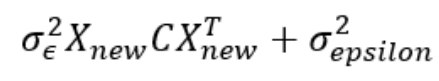

#### **Part B: Testing**

1) Our question is : Is the distribution of the height of the patients who have ever smoked stochasticly bigger than the distribution of the height of the patients who have never smoked?

In [451]:
np.random.seed(12)
diseases_sample = diseases_df.sample(n, replace=False)
diseases_sample

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Is_Male,Age,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
28250,3,Within the past year,1,0,0,0,0,0,0,1,72,170.0,72.57,25.06,0,0.0,60.0,30.0,0.0
303136,2,Within the past year,0,0,0,0,1,0,0,0,47,163.0,91.17,34.50,1,0.0,8.0,20.0,0.0
200602,3,Within the past 2 years,1,0,0,0,0,0,0,0,21,170.0,72.57,25.06,0,3.0,12.0,20.0,8.0
22679,3,Within the past year,1,0,1,0,0,0,1,1,72,180.0,117.93,36.26,1,1.0,30.0,4.0,8.0
41502,3,Within the past year,1,0,1,0,0,3,0,1,85,183.0,86.18,25.77,0,1.0,90.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129150,1,Within the past year,1,1,0,0,1,0,0,1,52,178.0,83.91,26.54,1,0.0,30.0,8.0,2.0
145395,2,Within the past year,1,1,0,0,0,3,1,1,72,183.0,119.29,35.67,0,2.0,4.0,30.0,8.0
172849,2,Within the past year,1,0,0,0,1,0,0,0,37,165.0,74.84,27.46,0,0.0,30.0,96.0,1.0
109707,4,Within the past 5 years,0,0,1,0,0,0,0,1,62,178.0,90.72,28.70,0,0.0,0.0,3.0,12.0


We want to check normality of the data of our sample:

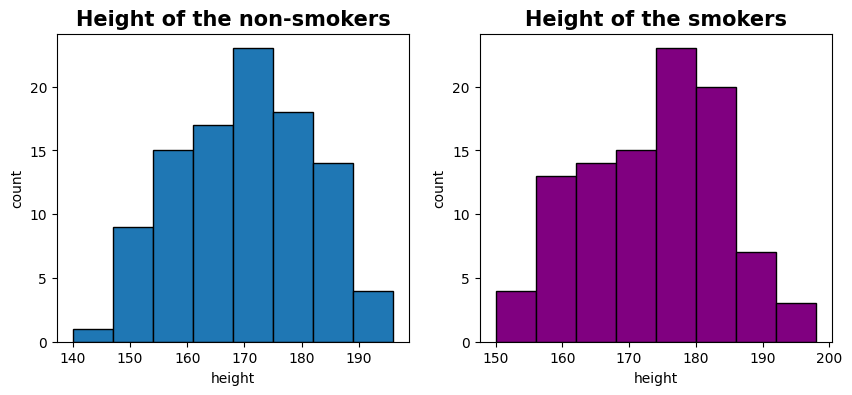

In [452]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

only_smokers_df = diseases_sample[diseases_sample['Smoking_History'] == 1]
only_no_smokers_df = diseases_sample[diseases_sample['Smoking_History'] == 0]

only_no_smokers_df['Height_(cm)'].hist(edgecolor = "black", grid = False, bins = 8, ax= axes[0])
axes[0].set_title("Height of the non-smokers", size = 15, fontweight = "bold")
axes[0].set_xlabel("height")
axes[0].set_ylabel("count")

only_smokers_df['Height_(cm)'].hist(edgecolor = "black", grid = False, bins = 8, ax =axes[1], color="purple")
axes[1].set_title("Height of the smokers", size = 15, fontweight = "bold")
axes[1].set_xlabel("height")
axes[1].set_ylabel("count")

plt.show()

We can see that the distribution of the height of the two categories seems to have a normal distribution.

3)a) We now estimate the esperence of the distributions of the height of the smokers and the height of the non-smokers:

In [453]:
smokers_height = only_smokers_df["Height_(cm)"].to_numpy()
no_smokers_height = only_no_smokers_df["Height_(cm)"].to_numpy()

mu1_estimator = np.mean(smokers_height)
mu2_estimator = np.mean(no_smokers_height)

delta_estimator = mu1_estimator - mu2_estimator

print(f"The estimator of mu 1 is: {mu1_estimator}")
print(f"The estimator of mu 2 is: {mu2_estimator}")
print(f"The estimator of delta is: {delta_estimator}")

The estimator of mu 1 is: 172.86868686868686
The estimator of mu 2 is: 169.2970297029703
The estimator of delta is: 3.571657165716573


The estimation that we found is the MLE because of the invariance of the MLE: we have g(mu1, mu2) = mu1 - mu2 so the MLE of g is mu1' - mu2' where mu1' and mu2' are the MLE. Because of the normality distribution of the data, it holds that the parameter is the esperence so the MLE is the mean of the sample. So the estimator that we found is the MLE.

b) We now find a confidence interval for delta:

In [454]:
sample_variance_smokers = np.var(smokers_height)
sample_variance_no_smokers = np.var(no_smokers_height)

delta_se = (sample_variance_no_smokers + sample_variance_smokers) **(1/2)

CI_delta = [delta_estimator - quantile_alpha * delta_se, delta_estimator + quantile_alpha * delta_se]
print(f"The CI is: {CI_delta}")

The CI is: [-27.271737854938134, 34.415052186371284]


c) Now we will estimate delta based on the whole data and we will check if it is contained in the confidence interval that we found on the previous question

In [455]:
only_smokers_all = diseases_df[diseases_df["Smoking_History"] == 1]
only_no_smokers_all = diseases_df[diseases_df["Smoking_History"] == 0]

all_smokers_height = only_smokers_all["Height_(cm)"].to_numpy()
all_no_smokers_height = only_no_smokers_all["Height_(cm)"].to_numpy()

mu1_all = np.mean(all_smokers_height)
mu2_all = np.mean(all_no_smokers_height)
delta_all = mu1_all - mu2_all

print(f"The value of delta on the whole data is: {delta_all}")
print(f"Is this value contained in the confidence interval? {delta_all >= CI_delta[0] and delta_all <= CI_delta[1]}")

The value of delta on the whole data is: 1.1236728659823711
Is this value contained in the confidence interval? True


d) Now, we will perform the Wald Test and the permatations test in order to check our hypothesis. Because we want to check if the distribution of the height of the smokers is stochasticly bigger than the distribution of the height of the non-smokers, and because of the normality of the two distributions, we saw that in HW5 that the previous holds if and only if the variances of the height of smokers and the non-smokers are equal and delta > 0. So to check this we need to perform the F-test and the one-sided Wald test on the following hypothesis:

HO: The distribution of the height of the smokers is stochasticly equal than the distribution of the height of the non-smokers

H1: The distribution of the height of the smokers is stochasticly bigger than the distribution of the height of the non-smokers

In [456]:
def one_sided_wald_test(delta_estimator, delta_se, alpha):
  wald_statistic = delta_estimator / delta_se
  wald_rejection_region = stats.norm.ppf(1 - alpha)
  p_value_wald = stats.norm.cdf(-abs(wald_statistic))

  print(f"Wald Statistic: {wald_statistic}")
  print(f"Wald-Test quantile: {wald_rejection_region}")
  print(f"P-value of the Wald test is: {p_value_wald}")
  print(f"Reject H0? : {abs(wald_statistic) > abs(wald_rejection_region)}")

In [457]:
def F_test(only_smokers_df, only_no_smokers_df, alpha):
  n_no_smokers = only_no_smokers_df.shape[0]
  n_smokers = only_smokers_df.shape[0]

  variance_no_smokers = only_no_smokers_df["Height_(cm)"].var(ddof=0)
  variance_smokers = only_smokers_df["Height_(cm)"].var(ddof=0)

  if variance_no_smokers < variance_smokers:
    F_statistic = variance_smokers / variance_no_smokers
    F_rejection_region = stats.f.ppf(1 - alpha, n_smokers - 1, n_no_smokers - 1)
    p_value_f = 1 - stats.f.cdf(F_statistic, n_smokers - 1, n_no_smokers - 1)

  else:
    F_statistic = variance_no_smokers / variance_smokers
    F_rejection_region = stats.f.ppf(1 - alpha, n_no_smokers - 1, n_smokers - 1)
    p_value_f = 1 - stats.f.cdf(F_statistic, n_no_smokers - 1, n_smokers - 1)

  print(f"F-Statistic: {F_statistic}")
  print(f"F-test quantile: {F_rejection_region}")
  print(f"The P-value of the F-test is: {p_value_f}")
  print(f"The variances of the two categories are equal with level of confidence of {100*(1 - alpha)}% ? {F_statistic <= F_rejection_region}")
  print()

In [458]:
F_test(only_smokers_df, only_no_smokers_df, alpha)
one_sided_wald_test(delta_estimator, delta_se, alpha)

F-Statistic: 1.1946229920252072
F-test quantile: 1.394535427769668
The P-value of the F-test is: 0.1891859337046483
The variances of the two categories are equal with level of confidence of 95.0% ? True

Wald Statistic: 0.2269633224630761
Wald-Test quantile: 1.6448536269514722
P-value of the Wald test is: 0.4102261311870554
Reject H0? : False


We can see that with level of confidence of 95% that the variances of the two categories are equal and that we did not reject the null hypothesis that delta > 0. So we can say that the distribution of the height of the smokers is stochasticly not bigger that the distribution of the height of the non-smokers.

We now perform the permutations test with the resampling method, we will sample B random permutations, and calculate the p-value. We will check the following hypothesis:

HO: The distribution of the height of the smokers is stochasticly equal than the distribution of the height of the non-smokers

H1: The distribution of the height of the smokers is stochasticly bigger than the distribution of the height of the non-smokers

So, we will reject H0 if p-value > alpha

In [459]:
import random

def permutations_test(df, col, true_estimator, statistic_func, alpha, order_statistic):
  n_smokers = df.shape[0]
  counter = 0

  for b in range(B):
    permutations = [None, None]
    heights = [None, None]

    permutations[0] = random.sample(range(diseases_sample.shape[0]), n_smokers)
    permutations[1] = [i for i in range(diseases_sample.shape[0]) if i not in permutations[0]]

    heights[0] = diseases_sample.iloc[permutations[0], :][col].values
    heights[1] = diseases_sample.iloc[permutations[1], :][col].values

    if order_statistic:
      statistic_permutation = statistic_func(heights[0])

    else:
      statistic_permutation = sum([statistic_func(heights[0]), - statistic_func(heights[1])])

    if true_estimator <= statistic_permutation:
      counter += 1

  p_value_permutation = counter/B

  print(f"Permutation test:")
  print(f"P-Value: {p_value_permutation}")
  print(f"Reject H0? {p_value_permutation <= alpha}")

In [460]:
permutations_test(only_smokers_df,"Height_(cm)", delta_estimator, np.mean, alpha, False)

Permutation test:
P-Value: 0.018
Reject H0? True


We can see that in the permutations test, we did reject the null hypothesis with level of confidence of 95%, so we can say that the distribution of the height of the smokers is stochasticly bigger than the distribution of the height of the non-smokers.

4)a) We now estimate the difference of the medians:

In [461]:
m1_estimator = only_smokers_df['Height_(cm)'].median()
m2_estimator = only_no_smokers_df['Height_(cm)'].median()
delta_median_estimator = m1_estimator - m2_estimator

print(f"The estimator of m1 is: {m1_estimator}")
print(f"The estimator of m2 is: {m2_estimator}")
print(f"The estimator of delta is: {delta_median_estimator}")

The estimator of m1 is: 175.0
The estimator of m2 is: 170.0
The estimator of delta is: 5.0


We saw previously that the assumption of normality of the data is okay. But we know that the normal distribution is symmetric around the esperence. So, in this case, the median and the esperence are equal. So, because of the average of the sample is the MLE of the esperence, so that the median of the sample is the MLE of the true medians. Furthermore, because of the invariance of the MLE, delta_estimator is the MLE of the true value of the difference of the medians delta.

b)Now, we will calculate the confidence interval of the difference of the medians. We saw that the true median equal to the value of the esperence.

In [462]:
CI_delta_med = [delta_median_estimator - quantile_alpha * delta_se, delta_median_estimator + quantile_alpha * delta_se]
print(f"The confidence interval of the difference of the medians is: {CI_delta_med}")

The confidence interval of the difference of the medians is: [-25.843395020654707, 35.84339502065471]


c) Now we calculate the difference of the medians ob the whole data and we will see if it is contained on the confidence interval.

In [463]:
only_smokers_all = diseases_df[diseases_df["Smoking_History"] == 1]
only_no_smokers_all = diseases_df[diseases_df["Smoking_History"] == 0]

all_m1 = only_smokers_all['Height_(cm)'].median()
all_m2 = only_no_smokers_all['Height_(cm)'].median()
delta_median_all = all_m1 - all_m2

print(f"The value of delta on the whole data is: {delta_median_all}")
print(f"Is this value contained in the confidence interval? {delta_median_all >= CI_delta_med[0] and delta_median_all <= CI_delta_med[1]}")

The value of delta on the whole data is: 0.0
Is this value contained in the confidence interval? True


d) Now we perform the permutations test in order to check the following hypotheses using the median statistic and using the resampling method:

In [464]:
permutations_test(only_smokers_df, "Height_(cm)", delta_median_estimator, np.median, alpha, False)

Permutation test:
P-Value: 0.061
Reject H0? False


We can see that using the medians statistic, we did not reject the null hypothesis with level of confidence 95%. So, the distribution of the height of the smokers is not stochasticly bigger than the distribution of the height of the non-smokers.

e)
- ***Wald Test***: we saw earlier that our estimator is the MLE of delta, so it has the property of asymptotic normality, so we can perform Wald Test on it.

- ***T-Test***: We have to check some assumptions. 1) Normal distribution of the data: True as we saw previously. 2) Independence of the examples: True 3) Equality of the variances, when they are unknown: True as we saw using F-Test. So, we can perform a T-Test on it.

5)We now perform the permutations test using the order statristic and using the resampling method:

In [465]:
diseases_sample['Height_(cm)_rank'] = diseases_sample['Height_(cm)'].rank()

only_smokers_with_rank = diseases_sample[diseases_sample["Smoking_History"] == 1]
only_no_smokers_with_rank = diseases_sample[diseases_sample["Smoking_History"] == 0]

S1 = np.sum(only_smokers_with_rank['Height_(cm)_rank'].values)

permutations_test(only_smokers_with_rank, "Height_(cm)_rank", S1, np.sum, alpha, True)

Permutation test:
P-Value: 0.019
Reject H0? True


With level of confidence 95%, using the resampling method and the order statistic, we did reject the null hypothesis, so we can say that the distribution of the height of the smokers is stochasticly bigger than the distribution of the height of the non-smokers.

Now, we will use the normal approximation:

In [467]:
n = only_smokers_df.shape[0]
m = only_no_smokers_df.shape[0]
N = n + m

quantile_norm = stats.norm.ppf(1 - alpha)
order_statistic_esperence = n * (N + 1) / 2
order_statistic_var = m * n * (N + 1) / 12

statistic = (S1 - order_statistic_esperence)/(order_statistic_var **(1/2))

print(f"The test statistic is: {statistic}")
print(f"The normal quantile is: {quantile_norm}")
print(f"Reject H0? {statistic >= quantile_norm}")

The test statistic is: 2.221151558752145
The normal quantile is: 1.6448536269514722
Reject H0? True


We can see that in two cases, we did not reject the null hypothesis, so the distribution of the height of the smokers is stochasticly bigger that the distribution of he height of the non-smokers.

6) We can see that with all the tests, it seems that the distribution of the height of the smokers is stochasticly bigger that the distribution of the height of the non-smokers. It is logical regarding the data because in our sample we can see that the values of the height of the smokers is bigger that the values of the height of the non-smokers. We saw that there is a normal distribution of the height for the two categories and that the variances are the same. So, all the results are logical when seeing the histograms.